### K Nearest Neighbors

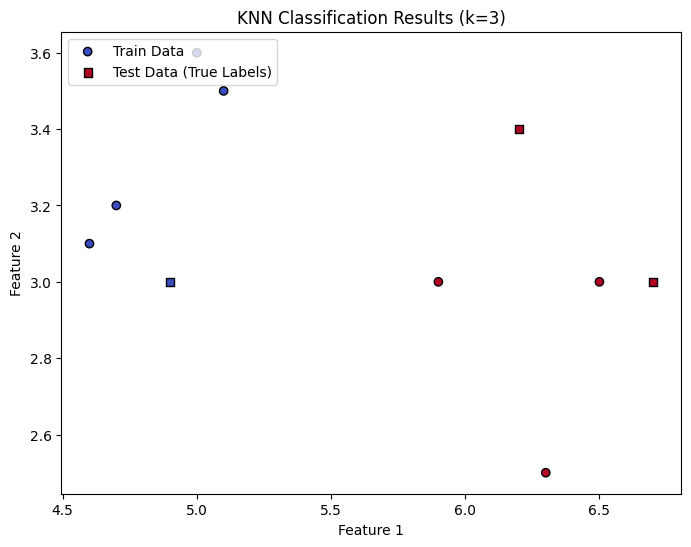

Predictions: [1 0 1]
Actual labels: [1 0 1]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter

# Calculate Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

# KNN Algorithm for Classification
def knn_classify(X_train, y_train, X_test, k=3):
    predictions = []
    
    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return np.array(predictions)

# Example DataFrame dataset
data = {
    'Feature1': [5.1, 4.9, 4.7, 4.6, 5.0, 6.7, 6.3, 6.5, 6.2, 5.9],
    'Feature2': [3.5, 3.0, 3.2, 3.1, 3.6, 3.0, 2.5, 3.0, 3.4, 3.0],
    'Label': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
}
df = pd.DataFrame(data)

# Separate features and labels
X = df[['Feature1', 'Feature2']].values
y = df['Label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Run KNN Classification
k = 3
predictions = knn_classify(X_train, y_train, X_test, k=k)

# Simplified Plotting
plt.figure(figsize=(8, 6))

# Plot training and test data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='s', edgecolor='k', label='Test Data (True Labels)')


# Add legend and labels
plt.legend(loc='upper left')
plt.title("KNN Classification Results (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Predictions:", predictions)
print("Actual labels:", y_test)

